In [163]:
import fbprophet as fb
import pandas as pd
import numpy as np

In [164]:
data = pd.read_csv('/home/ganesh/Downloads/allYearHarangi.csv')
data

,Dates,Present Storage(TMC),Reservoir Level(TMC),Inflow,Outflow,MADIKERI,SOMWARPET,VIRAJPET
0,2011-01-01,3.74,2835.90,142.0,0.0,0.0,0.0,0.0
1,2011-01-02,3.76,2836.09,239.0,0.0,0.0,0.0,0.0
2,2011-01-03,3.77,2836.22,166.0,0.0,0.0,0.0,0.0
3,2011-01-04,3.78,2836.31,118.0,0.0,0.0,0.0,0.0
4,2011-01-05,3.79,2836.41,130.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2917,2018-12-27,1.59,2806.15,103.0,15.0,0.0,0.0,0.0
2918,2018-12-28,1.60,2806.33,98.0,15.0,0.0,0.0,0.0
2919,2018-12-29,1.61,2806.54,102.0,15.0,0.0,0.0,0.0
2920,2018-12-30,1.62,2806.72,99.0,15.0,0.0,0.0,0.0


In [165]:
y_axis = data.Inflow

In [166]:
x_axis = data.MADIKERI

In [167]:
data1 = data.drop(columns = ['Present Storage(TMC)','Reservoir Level(TMC)','Outflow','SOMWARPET','VIRAJPET'])

In [168]:
data1

,Dates,Inflow,MADIKERI
0,2011-01-01,142.0,0.0
1,2011-01-02,239.0,0.0
2,2011-01-03,166.0,0.0
3,2011-01-04,118.0,0.0
4,2011-01-05,130.0,0.0
...,...,...,...
2917,2018-12-27,103.0,0.0
2918,2018-12-28,98.0,0.0
2919,2018-12-29,102.0,0.0
2920,2018-12-30,99.0,0.0


In [169]:
df = pd.DataFrame(data1)
df.drop(columns = ['Inflow','MADIKERI'],inplace = True)
df

,Dates
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
2917,2018-12-27
2918,2018-12-28
2919,2018-12-29
2920,2018-12-30


In [170]:
# mix = np.mat(data1.loc[:,['Inflow','MADIKERI']])
# mix[0]
# a = list()
# for i in range(len(mix)):
#     a.append(list(np.array(mix[i])))
# a = np.array(a)
# print(a.shape)
# a.reshape(2922,2)

In [171]:
df = df.rename(columns = {'Dates':'ds'})
df['y'] = range(0,2922) 
df

,ds,y
0,2011-01-01,0
1,2011-01-02,1
2,2011-01-03,2
3,2011-01-04,3
4,2011-01-05,4
...,...,...
2917,2018-12-27,2917
2918,2018-12-28,2918
2919,2018-12-29,2919
2920,2018-12-30,2920


In [172]:
df['Inflow'] = data1.Inflow

In [177]:
df['MADIKERI'] = data.MADIKERI
df['SOMWARPET'] = data.SOMWARPET
df['VIRAJPET'] = data.VIRAJPET

In [180]:
m = fb.Prophet(daily_seasonality = True)
m.add_regressor('Inflow')
m.add_regressor('MADIKERI')
m.add_regressor('SOMWARPET')
m.add_regressor('VIRAJPET')

df_train = df.loc[df["ds"]<"2017-12-31"]
df_test  = df.loc[df["ds"]>="2018-01-01"]
df

,ds,y,Inflow,MADIKERI,SOMWARPET,VIRAJPET
0,2011-01-01,0,142.0,0.0,0.0,0.0
1,2011-01-02,1,239.0,0.0,0.0,0.0
2,2011-01-03,2,166.0,0.0,0.0,0.0
3,2011-01-04,3,118.0,0.0,0.0,0.0
4,2011-01-05,4,130.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2917,2018-12-27,2917,103.0,0.0,0.0,0.0
2918,2018-12-28,2918,98.0,0.0,0.0,0.0
2919,2018-12-29,2919,102.0,0.0,0.0,0.0
2920,2018-12-30,2920,99.0,0.0,0.0,0.0


In [181]:
m.fit(df_train)

In [182]:
forecast = m.predict(df_test.drop(columns="y"))

In [183]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Inflow,Inflow_lower,Inflow_upper,MADIKERI,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2556.995241,2556.992662,2557.006970,2556.995241,2556.995241,0.000009,0.000009,0.000009,-0.000016,...,-0.000001,-0.000001,-0.000001,-0.000563,-0.000563,-0.000563,0.0,0.0,0.0,2556.999466
1,2018-01-02,2557.995242,2557.992156,2558.006679,2557.995242,2557.995242,0.000009,0.000009,0.000009,-0.000016,...,0.000002,0.000002,0.000002,-0.000606,-0.000606,-0.000606,0.0,0.0,0.0,2557.999427
2,2018-01-03,2558.995242,2558.992046,2559.005803,2558.995242,2558.995242,0.000009,0.000009,0.000009,-0.000016,...,0.000002,0.000002,0.000002,-0.000647,-0.000647,-0.000647,0.0,0.0,0.0,2558.999387
3,2018-01-04,2559.995242,2559.991945,2560.006789,2559.995242,2559.995242,0.000009,0.000009,0.000009,-0.000016,...,0.000005,0.000005,0.000005,-0.000685,-0.000685,-0.000685,0.0,0.0,0.0,2559.999351
4,2018-01-05,2560.995242,2560.992556,2561.006319,2560.995242,2560.995242,0.000009,0.000009,0.000009,-0.000016,...,0.000005,0.000005,0.000005,-0.000722,-0.000722,-0.000722,0.0,0.0,0.0,2560.999315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,2916.995318,2916.991345,2917.008739,2916.991026,2917.000241,0.000009,0.000009,0.000009,-0.000016,...,0.000005,0.000005,0.000005,-0.000333,-0.000333,-0.000333,0.0,0.0,0.0,2916.999777
361,2018-12-28,2917.995319,2917.991289,2918.007902,2917.991009,2918.000254,0.000009,0.000009,0.000009,-0.000016,...,0.000005,0.000005,0.000005,-0.000376,-0.000376,-0.000376,0.0,0.0,0.0,2917.999735
362,2018-12-29,2918.995319,2918.991430,2919.008471,2918.990989,2919.000256,0.000009,0.000009,0.000009,-0.000016,...,-0.000009,-0.000009,-0.000009,-0.000420,-0.000420,-0.000420,0.0,0.0,0.0,2918.999677
363,2018-12-30,2919.995319,2919.991117,2920.008558,2919.990969,2920.000270,0.000009,0.000009,0.000009,-0.000016,...,-0.000004,-0.000004,-0.000004,-0.000464,-0.000464,-0.000464,0.0,0.0,0.0,2919.999638


In [185]:
forecast.to_csv(r"/home/ganesh/Downloads/exp_pred.csv")

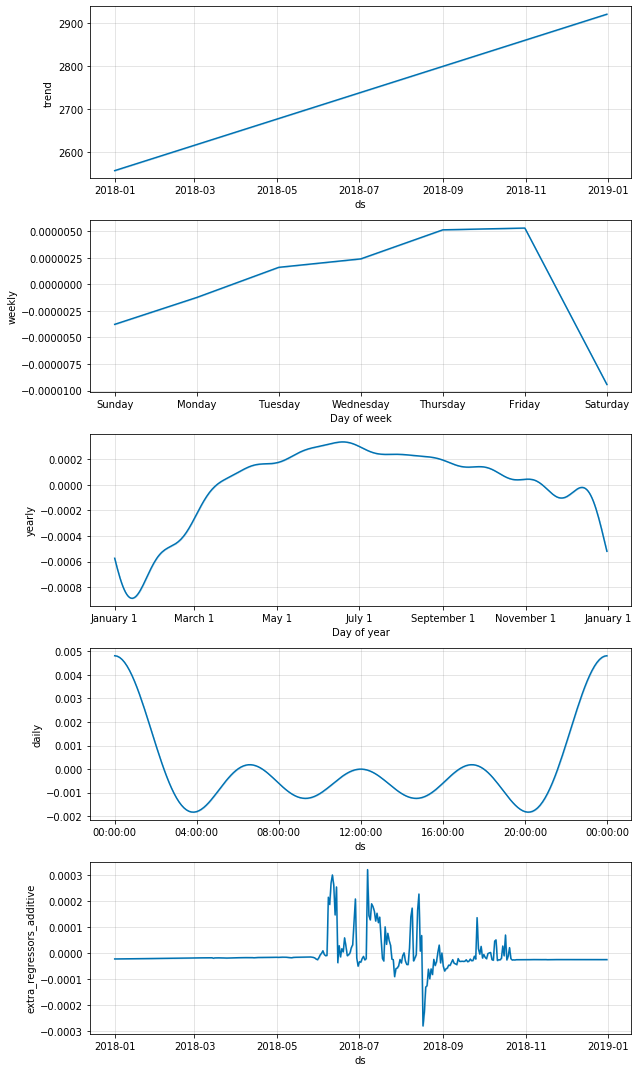

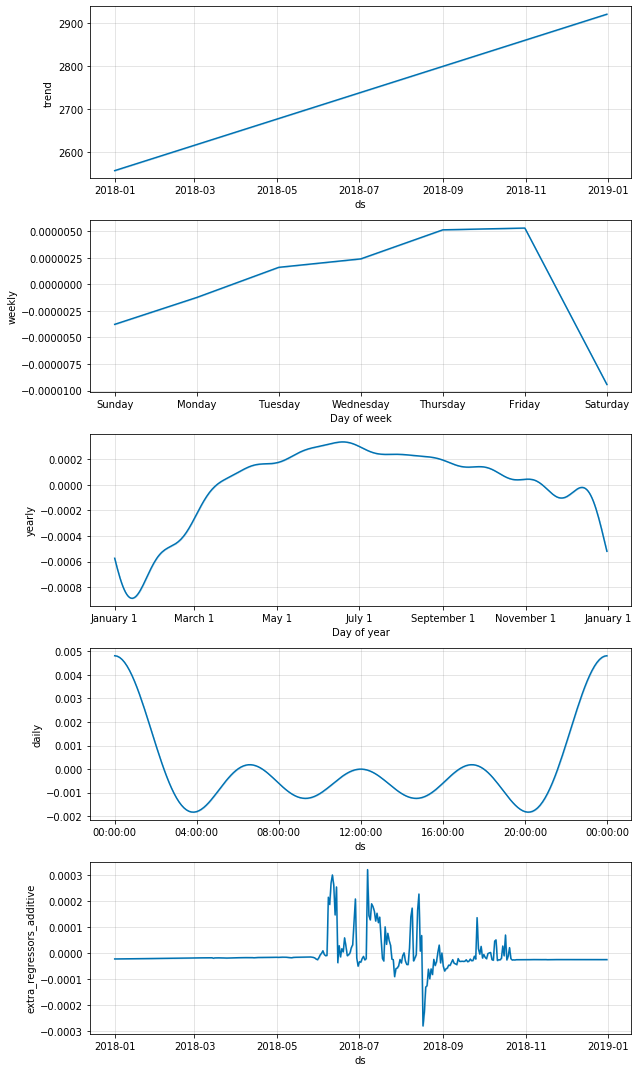

In [186]:
m.plot_components(forecast)

In [202]:
import matplotlib.pyplot

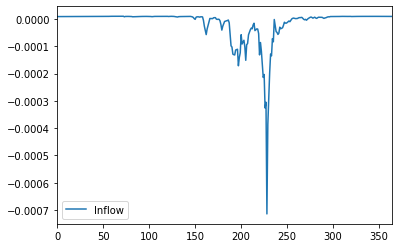

In [208]:
forecast.plot(y='Inflow')